## Name - Bushra Rahman
### Data Science Intern at CodeClause - Dec/2023

### Allocated projects:
#### Project No. 02 - Speech Emotion Recognition

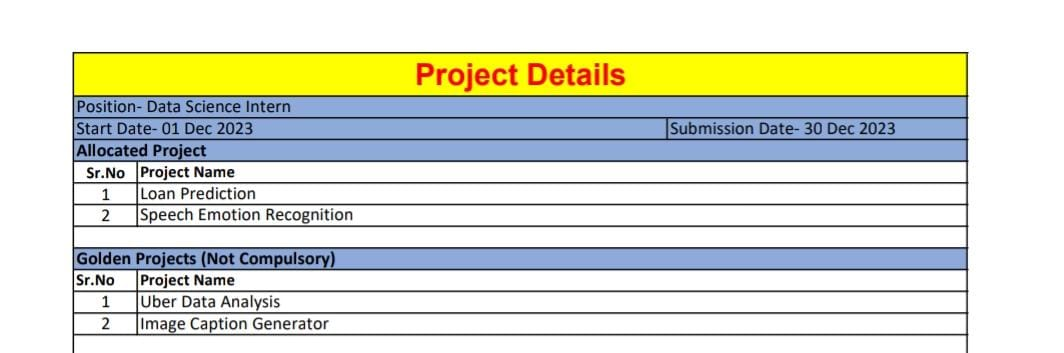

## Importing required libraries :

In [2]:
import librosa
import soundfile
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Function to extract features from audio files

In [3]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
        return result

In [7]:
def load_data(test_size=0.2):
    x, y = [], []
    for file in glob.glob("C:\CodeClause\RAVDEES\Actor_*\\*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [8]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}
observed_emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

### Split the dataset into training and testing sets

In [9]:
x_train, x_test, y_train, y_test = load_data(test_size=0.25)

## Model Training

### Support Vector Machine (SVM) classifier -

In [10]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear')

#### Make predictions on the test set

In [43]:
y_pred = svm_classifier.predict(x_test)

#### Evaluate the performance of the model

In [38]:
accuracy = accuracy_score(y_test, y_pred)*100

In [39]:
print("Accuracy:", accuracy)

Accuracy: 45.55555555555556


### Random Forest Classifier -

In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(x_train,y_train)

RandomForestClassifier()

#### Evaluate the performance of the model

In [36]:
accuracy = model.score(x_test,y_test)*100

In [37]:
print("Accuracy:", accuracy)

Accuracy: 50.55555555555556


### Logistic Regression -

In [40]:
model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

C:\Users\Bushra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Make predictions on the test set

In [19]:
pred = model.predict(x_test)

In [20]:
pred

array(['angry', 'sad', 'calm', 'calm', 'happy', 'angry', 'surprised',
       'sad', 'happy', 'angry', 'sad', 'surprised', 'fearful', 'sad',
       'fearful', 'calm', 'sad', 'surprised', 'sad', 'calm', 'angry',
       'surprised', 'fearful', 'fearful', 'happy', 'angry', 'sad', 'calm',
       'calm', 'sad', 'calm', 'calm', 'happy', 'fearful', 'fearful',
       'surprised', 'disgust', 'fearful', 'sad', 'fearful', 'surprised',
       'calm', 'fearful', 'calm', 'angry', 'calm', 'calm', 'angry',
       'happy', 'calm', 'calm', 'angry', 'fearful', 'fearful', 'sad',
       'sad', 'angry', 'disgust', 'happy', 'fearful', 'fearful', 'sad',
       'angry', 'surprised', 'fearful', 'happy', 'happy', 'calm', 'happy',
       'disgust', 'fearful', 'fearful', 'surprised', 'surprised',
       'fearful', 'sad', 'calm', 'surprised', 'calm', 'happy', 'angry',
       'happy', 'surprised', 'angry', 'angry', 'calm', 'surprised',
       'fearful', 'surprised', 'disgust', 'surprised', 'happy', 'calm',
       'an

#### Evaluate the performance of the model

In [21]:
model.score(x_test,y_test)*100

42.5

### MLP Classifier -

In [46]:
model = MLPClassifier(hidden_layer_sizes=(300,), max_iter=500, alpha=0.01, random_state=9)

In [47]:
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(300,), max_iter=500,
              random_state=9)

#### Make predictions on the test set

In [48]:
y_pred = model.predict(x_test)

#### Evaluate the performance of the model

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 45.56%
